Text Minning-Amazon data

Q2]1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [ ]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup


In [ ]:
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass


In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break


  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df


,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nनाइट कैमरा अच्छा नहीं है प...,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,15 November 2023
1,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023
2,4.0,4.0 out of 5 stars\nGood Choice,Pros :Build QualityCameraValue for moneyBatter...,17 November 2023
3,4.0,4.0 out of 5 stars\n👍,It's valuable price ok,16 November 2023
4,4.0,4.0 out of 5 stars\nGood,Good,14 November 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nAll goods,I like this phone but sonud is very low,20 September 2023
96,3.0,3.0 out of 5 stars\nBad touch quality average ...,After using 3 months I am writing this review ...,8 November 2023
97,4.0,4.0 out of 5 stars\nNot expecting More Perform...,Around this budget Phone is good and value for...,11 September 2023
98,5.0,5.0 out of 5 stars\nGot it at ₹17249,Using it since 2 months . Good Phone to buy wi...,26 October 2023


In [ ]:
df.to_csv("C:\\Users\\hp\\Desktop\\All assignments\\Amazon_Reviews_Oneplus_Nord_CE2.csv")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [ ]:
reviews=pd.read_csv('/content/C:\\Users\\hp\\Desktop\\All assignments\\Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews


,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nनाइट कैमरा अच्छा नहीं है प...,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,15 November 2023
1,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023
2,4.0,4.0 out of 5 stars\nGood Choice,Pros :Build QualityCameraValue for moneyBatter...,17 November 2023
3,4.0,4.0 out of 5 stars\n👍,It's valuable price ok,16 November 2023
4,4.0,4.0 out of 5 stars\nGood,Good,14 November 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nAll goods,I like this phone but sonud is very low,20 September 2023
96,3.0,3.0 out of 5 stars\nBad touch quality average ...,After using 3 months I am writing this review ...,8 November 2023
97,4.0,4.0 out of 5 stars\nNot expecting More Perform...,Around this budget Phone is good and value for...,11 September 2023
98,5.0,5.0 out of 5 stars\nGot it at ₹17249,Using it since 2 months . Good Phone to buy wi...,26 October 2023


In [ ]:
reviews.Rating.describe()


count    100.000000
mean       4.070000
std        0.382839
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [ ]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()


,Review,word_count
0,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,22
1,Very good and Stylish phone as compared to oth...,194
2,Pros :Build QualityCameraValue for moneyBatter...,15
3,It's valuable price ok,4
4,Good,1


In [ ]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()


,Review,char_count
0,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,105.0
1,Very good and Stylish phone as compared to oth...,1003.0
2,Pros :Build QualityCameraValue for moneyBatter...,111.0
3,It's valuable price ok,22.0
4,Good,4.0


In [ ]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()


,Review,avg_word
0,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,3.818182
1,Very good and Stylish phone as compared to oth...,4.175258
2,Pros :Build QualityCameraValue for moneyBatter...,6.466667
3,It's valuable price ok,4.750000
4,Good,4.000000


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()


,Review,stopwords
0,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,0
1,Very good and Stylish phone as compared to oth...,81
2,Pros :Build QualityCameraValue for moneyBatter...,5
3,It's valuable price ok,0
4,Good,0


In [ ]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()


,Review,hashtags
0,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,0
1,Very good and Stylish phone as compared to oth...,0
2,Pros :Build QualityCameraValue for moneyBatter...,0
3,It's valuable price ok,0
4,Good,0


In [ ]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()


,Review,numerics
0,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,0
1,Very good and Stylish phone as compared to oth...,7
2,Pros :Build QualityCameraValue for moneyBatter...,0
3,It's valuable price ok,0
4,Good,0


In [ ]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()


,Review,upper
0,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,0
1,Very good and Stylish phone as compared to oth...,10
2,Pros :Build QualityCameraValue for moneyBatter...,0
3,It's valuable price ok,0
4,Good,0


In [ ]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)


In [ ]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))


0    रात में वीडियो रिकॉर्डिंग of ofे हैं तो कैofा ...
1    Very good and Stylish phone as compared to oth...
2    Gros :Build QualityCameraValue for moneyBatter...
3                               It's valuable price ok
4                                                 Good
Name: Review, dtype: object

In [ ]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])


0     15
1      1
2     17
3     16
4     14
      ..
95    20
96     8
97    11
98    26
99     8
Name: Review_Date, Length: 100, dtype: object 
 0      November
1       October
2      November
3      November
4      November
        ...    
95    September
96     November
97    September
98      October
99      October
Name: Review_Date, Length: 100, dtype: object 
 0     2023
1     2023
2     2023
3     2023
4     2023
      ... 
95    2023
96    2023
97    2023
98    2023
99    2023
Name: Review_Date, Length: 100, dtype: object


In [ ]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]


,Date,Month,Year
0,15,November,2023
1,1,October,2023
2,17,November,2023
3,16,November,2023
4,14,November,2023
...,...,...,...
95,20,September,2023
96,8,November,2023
97,11,September,2023
98,26,October,2023


In [ ]:
df.Month.value_counts()


October      49
November     18
September    17
August       13
January       1
December      1
February      1
Name: Month, dtype: int64

In [ ]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]


,Month
0,November
1,October
2,November
3,November
4,November
...,...
95,September
96,November
97,September
98,October


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   hashtags     100 non-null    int64  
 5   Date         100 non-null    object 
 6   Month        100 non-null    object 
 7   Year         100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


In [ ]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   hashtags     100 non-null    int64  
 5   Date         100 non-null    int64  
 6   Month        100 non-null    object 
 7   Year         100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [ ]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()


,Rating,Title,Review,hashtags,Date,Month,Year
0,4.0,4.0 out of 5 stars\nनाइट कैमरा अच्छा नहीं है प...,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,0,15,November,2023
1,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,0,1,October,2023
2,4.0,4.0 out of 5 stars\nGood Choice,Pros :Build QualityCameraValue for moneyBatter...,0,17,November,2023
3,4.0,4.0 out of 5 stars\n👍,It's valuable price ok,0,16,November,2023
4,4.0,4.0 out of 5 stars\nGood,Good,0,14,November,2023


In [ ]:
df


,Rating,Title,Review,Review_Date,hashtags,Date,Month,Year
0,4.0,4.0 out of 5 stars\nनाइट कैमरा अच्छा नहीं है प...,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...,15 November 2023,0,15,November,2023
1,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023,0,1,October,2023
2,4.0,4.0 out of 5 stars\nGood Choice,Pros :Build QualityCameraValue for moneyBatter...,17 November 2023,0,17,November,2023
3,4.0,4.0 out of 5 stars\n👍,It's valuable price ok,16 November 2023,0,16,November,2023
4,4.0,4.0 out of 5 stars\nGood,Good,14 November 2023,0,14,November,2023
...,...,...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nAll goods,I like this phone but sonud is very low,20 September 2023,0,20,September,2023
96,3.0,3.0 out of 5 stars\nBad touch quality average ...,After using 3 months I am writing this review ...,8 November 2023,0,8,November,2023
97,4.0,4.0 out of 5 stars\nNot expecting More Perform...,Around this budget Phone is good and value for...,11 September 2023,0,11,September,2023
98,5.0,5.0 out of 5 stars\nGot it at ₹17249,Using it since 2 months . Good Phone to buy wi...,26 October 2023,0,26,October,2023


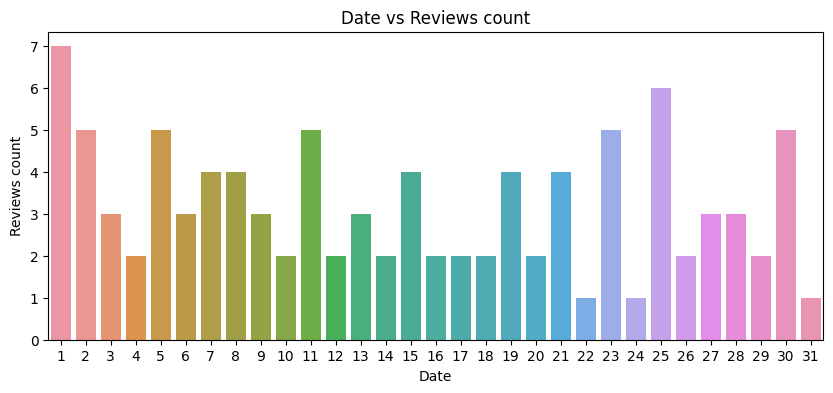

In [ ]:
#data visualization
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(10,4))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()


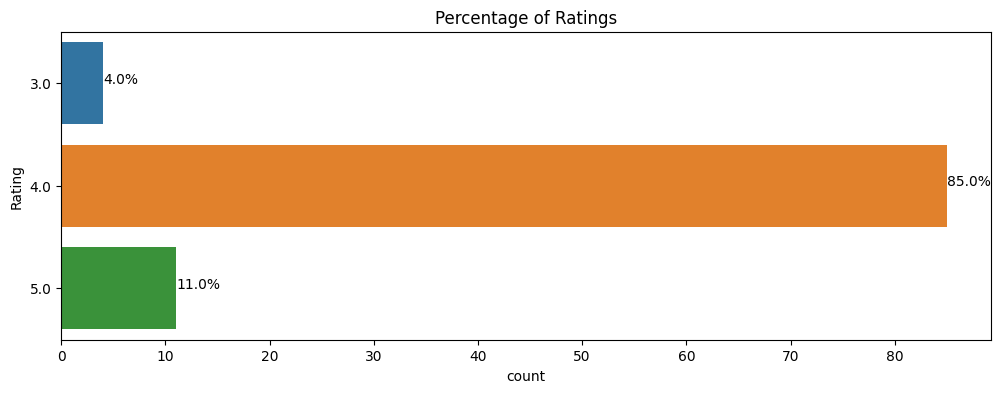

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


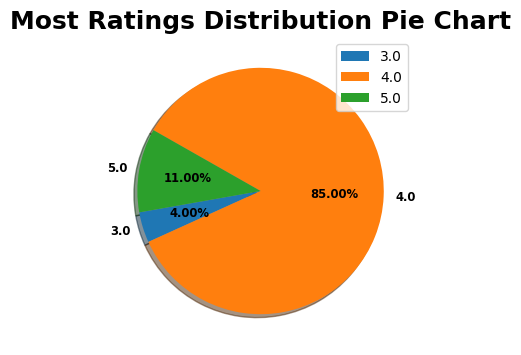

In [ ]:
plt.figure(figsize = (12,4))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()


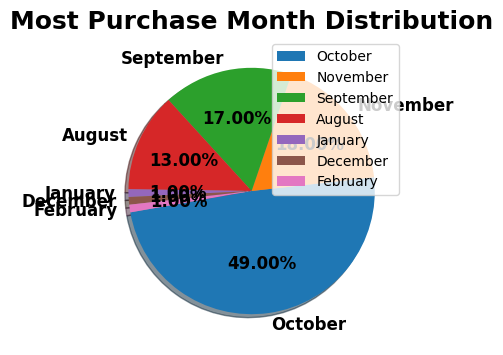

In [ ]:
plt.figure(figsize = (12,4))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()


In [ ]:
#text processing
data=df[['Review']]
data

,Review
0,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...
1,Very good and Stylish phone as compared to oth...
2,Pros :Build QualityCameraValue for moneyBatter...
3,It's valuable price ok
4,Good
...,...
95,I like this phone but sonud is very low
96,After using 3 months I am writing this review ...
97,Around this budget Phone is good and value for...
98,Using it since 2 months . Good Phone to buy wi...


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))


In [ ]:
data

,Review
0,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...
1,very good stylish phone compared phones functi...
2,pros :build qualitycameravalue moneybatterycon...
3,it's valuable price ok
4,good
...,...
95,i like phone sonud low
96,"after using 3 months i writing review camara, ..."
97,around budget phone good value moneybut expect...
98,using since 2 months . good phone buy one plus...


In [ ]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()


,Clean_Reviews,Uncleaned_Reviews
0,,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...
3,valuable price ok,It's valuable price ok
4,good,Good


In [ ]:
#text preprocessing
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text


In [ ]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...
3,valuable price ok,It's valuable price ok
4,good,Good
5,quality,Quality
6,nice product,Nice product
7,thank,Thank You
8,acording price phone nice camera quality colou...,Acording to price of this phone.nice camera qu...
9,well packed delivered within day colour phone ...,Well packed. Delivered within a day. The colou...


In [ ]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,,रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...
3,valuable price ok,It's valuable price ok
4,good,Good
5,quality,Quality
6,nice product,Nice product
7,thank,Thank You
8,acording price phone nice camera quality colou...,Acording to price of this phone.nice camera qu...
9,well packed delivered within day colour phone ...,Well packed. Delivered within a day. The colou...


In [ ]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...
3,valuable price ok,It's valuable price ok
4,good,Good
5,quality,Quality
6,nice product,Nice product
7,thank,Thank You
8,acording price phone nice camera quality colou...,Acording to price of this phone.nice camera qu...
9,well packed delivered within day colour phone ...,Well packed. Delivered within a day. The colou...
10,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."


In [ ]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
1,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
2,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...
3,valuable price ok,It's valuable price ok
4,good,Good
5,quality,Quality
6,nice product,Nice product
7,thank,Thank You
8,acording price phone nice camera quality colou...,Acording to price of this phone.nice camera qu...
9,well packed delivered within day colour phone ...,Well packed. Delivered within a day. The colou...
10,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."


In [ ]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
1,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...
2,valuable price ok,It's valuable price ok
3,good,Good
4,quality,Quality
5,nice product,Nice product
6,thank,Thank You
7,acording price phone nice camera quality colou...,Acording to price of this phone.nice camera qu...
8,well packed delivered within day colour phone ...,Well packed. Delivered within a day. The colou...
9,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [ ]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
1,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...
2,valuable price ok,It's valuable price ok
3,good,Good
4,quality,Quality
5,nice product,Nice product
6,thank,Thank You
7,acording price phone nice camera quality colou...,Acording to price of this phone.nice camera qu...
8,well packed delivered within day colour phone ...,Well packed. Delivered within a day. The colou...
9,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [ ]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
1,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...
2,valuable price ok,It's valuable price ok
3,good,Good
4,quality,Quality
5,nice product,Nice product
6,thank,Thank You
7,acording price phone nice camera quality colou...,Acording to price of this phone.nice camera qu...
8,well packed delivered within day colour phone ...,Well packed. Delivered within a day. The colou...
9,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."


In [ ]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe


,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,"[good, stylish, phone, compared, phone, functi..."
1,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...,"[pro, build, qualitycameravalue, moneybatteryc..."
2,valuable price ok,It's valuable price ok,"[valuable, price, ok]"
3,good,Good,[good]
4,quality,Quality,[quality]
...,...,...,...
93,like phone sonud low,I like this phone but sonud is very low,"[like, phone, sonud, low]"
94,using month writing review camara battery soun...,After using 3 months I am writing this review ...,"[using, month, writing, review, camara, batter..."
95,around budget phone good value moneybut expect...,Around this budget Phone is good and value for...,"[around, budget, phone, good, value, moneybut,..."
96,using since month good phone buy one plus bran...,Using it since 2 months . Good Phone to buy wi...,"[using, since, month, good, phone, buy, one, p..."


In [ ]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)


In [ ]:
#removing stopwords
import codecs
with codecs.open("/content/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])


a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
1,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...
2,valuable price ok,It's valuable price ok
3,good,Good
4,quality,Quality
5,nice product,Nice product
6,thank,Thank You
7,acording price phone nice camera quality colou...,Acording to price of this phone.nice camera qu...
8,well packed delivered within day colour phone ...,Well packed. Delivered within a day. The colou...
9,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."


In [ ]:
TextBlob(dataframe['Clean_Reviews'][1]).words


WordList(['pro', 'build', 'qualitycameravalue', 'moneybatterycons', 'price', 'range', 'good', 'enough', 'sometimes', 'hanging'])

In [ ]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)


0    [good, stylish, phone, compared, phone, functi...
1    [pro, build, qualitycameravalue, moneybatteryc...
2                                [valuable, price, ok]
3                                               [good]
4                                            [quality]
5                                      [nice, product]
6                                              [thank]
7    [acording, price, phone, nice, camera, quality...
8    [well, packed, delivered, within, day, colour,...
9    [basic, usage, okay, using, know, much, plasti...
Name: Clean_Reviews, dtype: object

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx


,stemmed
0,good stylish phone compar phone function like ...
1,pro build qualitycameravalu moneybatterycon pr...
2,valuabl price ok
3,good
4,qualiti
...,...
93,like phone sonud low
94,use month write review camara batteri sound pe...
95,around budget phone good valu moneybut expect ...
96,use sinc month good phone buy one plus brand


In [ ]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,good stylish phone compared phone function lik...
1,pro build qualitycameravalue moneybatterycons ...
2,valuable price ok
3,good
4,quality
...,...
93,like phone sonud low
94,using month writing review camara battery soun...
95,around budget phone good value moneybut expect...
96,using since month good phone buy one plus bran...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)


In [ ]:
print(cv.get_feature_names_out()[109:200])


['charm' 'cheap' 'check' 'chin' 'choice' 'choose' 'chuka' 'clean'
 'clearity' 'cod' 'color' 'colour' 'coloured' 'combination' 'come'
 'comfertble' 'comfort' 'comfortable' 'compare' 'compared' 'compass'
 'compete' 'competition' 'complain' 'complained' 'complaining' 'con'
 'conclude' 'confusing' 'connectivity' 'conscious' 'considering'
 'consumer' 'consumes' 'continue' 'convincing' 'cool' 'cost' 'could'
 'counter' 'country' 'cover' 'crash' 'crashing' 'creep' 'customised' 'cut'
 'daily' 'dark' 'day' 'deal' 'december' 'decent' 'decide' 'default'
 'defective' 'delete' 'delivered' 'delivers' 'delivery' 'depend' 'design'
 'device' 'didnt' 'dikkat' 'dimensity' 'disapponts' 'discharge' 'display'
 'done' 'download' 'drain' 'drop' 'due' 'durability' 'early' 'easily'
 'easy' 'edge' 'edit' 'else' 'emi' 'encounter' 'end' 'enough' 'equal'
 'especially' 'even' 'ever' 'everything' 'evident']


In [ ]:
print(cv.get_feature_names_out()[:100])


['aa' 'aai' 'aaj' 'aap' 'aati' 'abhi' 'able' 'absolute' 'absolutely' 'abt'
 'acha' 'achha' 'achhi' 'achievable' 'achieve' 'acording' 'actually' 'ad'
 'adapter' 'adjust' 'ago' 'almost' 'also' 'although' 'always' 'amazing'
 'amazon' 'amoled' 'amount' 'android' 'annoying' 'apne' 'app' 'applied'
 'apprehensive' 'approximately' 'apps' 'apt' 'around' 'ask' 'aspect'
 'asus' 'atleast' 'attache' 'aur' 'authenticity' 'average' 'away'
 'awesome' 'ba' 'baat' 'back' 'background' 'backup' 'bad' 'bahut' 'baki'
 'balance' 'band' 'bank' 'based' 'basic' 'batry' 'battery' 'baught'
 'believe' 'bell' 'best' 'better' 'bgmi' 'bhi' 'big' 'biggest' 'bit'
 'bloatware' 'bloatwares' 'blurred' 'bottom' 'bought' 'brand' 'branding'
 'break' 'brightness' 'browse' 'budget' 'bug' 'build' 'button' 'buy'
 'calculator' 'calender' 'call' 'calling' 'camara' 'camera' 'capability'
 'care' 'case' 'category' 'ce']


In [ ]:
print(tweetscv.toarray()[100:200])


[]


In [ ]:
#count vectorizer with n grams biarms and trigarms

In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


  0%|          | 0/98 [00:00<?, ?it/s]

In [ ]:
corpus[3]

'good'

In [ ]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X.shape


(98, 3544)

In [ ]:
cv.get_feature_names_out()[:20]


array(['aa', 'aa gya', 'aa gya tha', 'aai', 'aai hai', 'aaj', 'aaj saal',
       'aaj saal ho', 'aap', 'aap set', 'aap set chang', 'aati',
       'aati hai', 'aati hai jabardast', 'abhi', 'abhi tak',
       'abhi tak koi', 'abl', 'abl buy', 'abl buy phone'], dtype=object)

In [ ]:
cv.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df


,aa,aa gya,aa gya tha,aai,aai hai,aaj,aaj saal,aaj saal ho,aap,aap set,...,year share feedback,yet,yet aspect,yet aspect ok,youtub,youtub instagram,youtub instagram facebook,yt,yt heat,yt heat issu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


  0%|          | 0/98 [00:00<?, ?it/s]

In [ ]:
corpus[4]


'qualiti'

In [ ]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()


In [ ]:
X.shape


(98, 3544)

In [ ]:
tfidf_v.get_feature_names_out()[:20]


array(['aa', 'aa gya', 'aa gya tha', 'aai', 'aai hai', 'aaj', 'aaj saal',
       'aaj saal ho', 'aap', 'aap set', 'aap set chang', 'aati',
       'aati hai', 'aati hai jabardast', 'abhi', 'abhi tak',
       'abhi tak koi', 'abl', 'abl buy', 'abl buy phone'], dtype=object)

In [ ]:
tfidf_v.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df


,aa,aa gya,aa gya tha,aai,aai hai,aaj,aaj saal,aaj saal ho,aap,aap set,...,year share feedback,yet,yet aspect,yet aspect ok,youtub,youtub instagram,youtub instagram facebook,yt,yt heat,yt heat issu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#name entity recognization
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]



'good stylish phone compared phone function like iphone india poor population compared foreign country think people india able buy phone brand one plus minor problem phone consumes battery fast rest battery working well work approximately hour charge charge phone day one problem battery loss early otherwise good phone suggest indian buy phone requesting oneplus increase rate phone want buy buy end emi segesst one plus rate equal great indian festival baught one fact showed oneplus neighbour impressed want buy phone budget k overall full mark oneplus great product gallary oneplus thank pro build qualitycameravalue moneybatterycons price range good enough sometimes hanging valuable price ok good quality nice product thank acording price phone nice camera quality colour design well packed delivered within day colour phone good performance amazing picture quality good good lighting poor lighting give blurred image basic usage okay using know much plastic back cover good feel like cheap pho

In [ ]:
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


In [ ]:
for token in doc_block[:50]:
    print(token,token.pos_)


good ADJ
stylish ADJ
phone NOUN
compared VERB
phone NOUN
function NOUN
like ADP
iphone PROPN
india PROPN
poor ADJ
population NOUN
compared VERB
foreign ADJ
country NOUN
think VERB
people NOUN
india PROPN
able ADJ
buy VERB
phone NOUN
brand NOUN
one NUM
plus CCONJ
minor ADJ
problem NOUN
phone NOUN
consumes VERB
battery NOUN
fast ADJ
rest NOUN
battery NOUN
working VERB
well ADV
work VERB
approximately ADV
hour NOUN
charge NOUN
charge NOUN
phone NOUN
day NOUN
one NUM
problem NOUN
battery NOUN
loss NOUN
early ADV
otherwise ADV
good ADJ
phone NOUN
suggest VERB
indian ADJ


In [ ]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])


['quality', 'aur', 'software', 'sense', 'baki', 'phone', 'jaise', 'iqoo', 'let', 'charging', 'speed', 'rating', 'setting', 'change', 'pluse', 'iqoo', 'z', 'camera', 'purchased', 'phone', 'delivery', 'time', 'phone', 'g', 'camera', 'version', 'speed', 'come', 'charging', 'adapter', 'battery', 'good', 'need', 'improvement', 'app', 'management', 'health', 'found', 'using', 'phone', 'need', 'performance', 'improvement', 'phone', 'uioverall', 'option', 'camera', 'quality', 'gooddurability', 'goodsound', 'quality', 'phone', 'phone', 'hang', 'lot', 'take', 'process', 'thing', 'working', 'use', 'feature', 'camera', 'color', 'combination', 'connectivity', 'goodfingerprint', 'side', 'button', 'camera', 'phone', 'segment', 'encounter', 'bug', 'app', 'crash', 'idk', 'happening', 'performance', 'lag', 'frame', 'drop', 'game', 'camera', 'camera', 'make', 'photo', 'colour', 'oversaturated', 'lens', 'camera', 'review', 'go', 'getting', 'k', 'keep', 'mind', 'display', 'good', 'get', 'p']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results


,word,count
0,phone,54
1,camera,35
2,battery,19
3,quality,18
4,performance,13
5,oneplus,12
6,product,11
7,use,11
8,buy,10
9,price,10


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

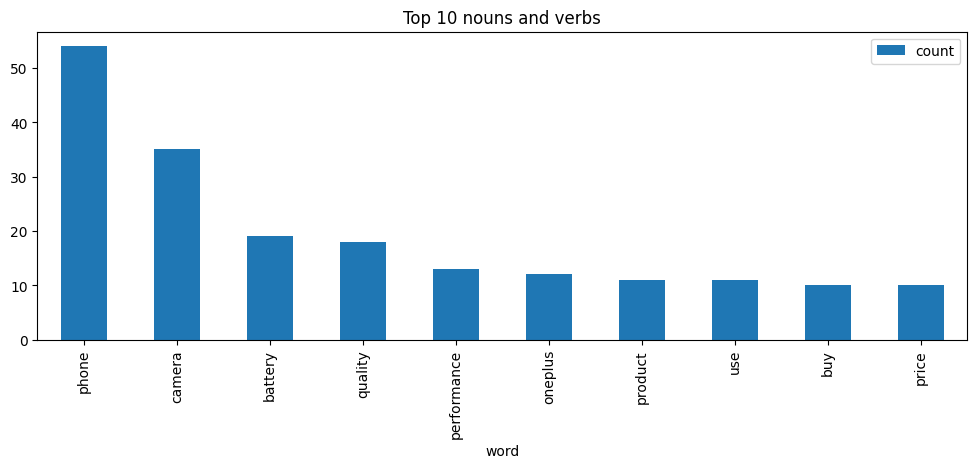

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,4),title='Top 10 nouns and verbs')


In [ ]:
#feature extraction
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


In [ ]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'


In [ ]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())


,Clean_Reviews
pos,97
neg,1


In [ ]:
dataframe.Clean_Reviews[8]


'well packed delivered within day colour phone good performance amazing picture quality good good lighting poor lighting give blurred image'

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])


{'neg': 0.098, 'neu': 0.442, 'pos': 0.461, 'compound': 0.8885}

In [ ]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()


,Review,scores
0,good stylish phone compared phone function lik...,"{'neg': 0.092, 'neu': 0.632, 'pos': 0.276, 'co..."
1,pro build qualitycameravalue moneybatterycons ...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp..."
2,valuable price ok,"{'neg': 0.0, 'neu': 0.159, 'pos': 0.841, 'comp..."
3,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
4,quality,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()


,Review,scores,compound
0,good stylish phone compared phone function lik...,"{'neg': 0.092, 'neu': 0.632, 'pos': 0.276, 'co...",0.9612
1,pro build qualitycameravalue moneybatterycons ...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.4404
2,valuable price ok,"{'neg': 0.0, 'neu': 0.159, 'pos': 0.841, 'comp...",0.6486
3,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404
4,quality,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df


,Review,scores,compound,sentiment
0,good stylish phone compared phone function lik...,"{'neg': 0.092, 'neu': 0.632, 'pos': 0.276, 'co...",0.9612,Positive
1,pro build qualitycameravalue moneybatterycons ...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.4404,Positive
2,valuable price ok,"{'neg': 0.0, 'neu': 0.159, 'pos': 0.841, 'comp...",0.6486,Positive
3,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
4,quality,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
...,...,...,...,...
93,like phone sonud low,"{'neg': 0.318, 'neu': 0.303, 'pos': 0.379, 'co...",0.1027,Positive
94,using month writing review camara battery soun...,"{'neg': 0.158, 'neu': 0.633, 'pos': 0.208, 'co...",0.0258,Neutral
95,around budget phone good value moneybut expect...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",0.7783,Positive
96,using since month good phone buy one plus bran...,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404,Positive


In [ ]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')


<Axes: xlabel='sentiment', ylabel='count'>

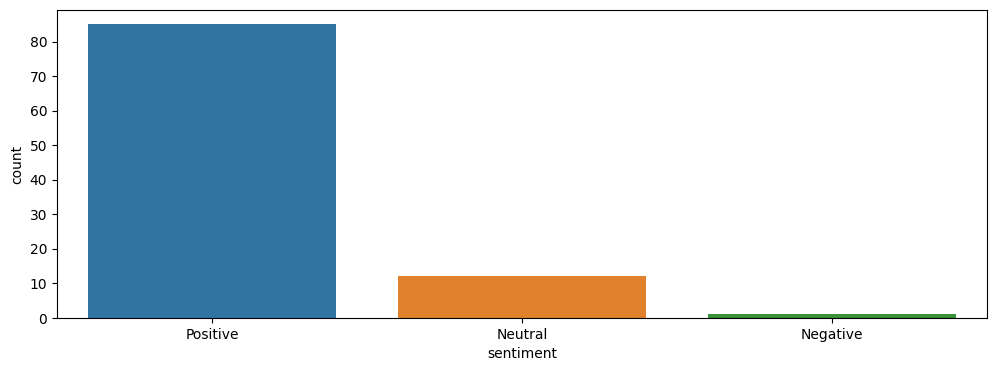

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='sentiment',data=df)


In [ ]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())


,Clean_Reviews
pos,95
neg,3


In [ ]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()


,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,0.534375,0.292187
1,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...,0.550000,0.350000
2,valuable price ok,It's valuable price ok,0.500000,0.500000
3,good,Good,0.600000,0.700000
4,quality,Quality,0.000000,0.000000


Text(0, 0.5, 'Subjectivity')

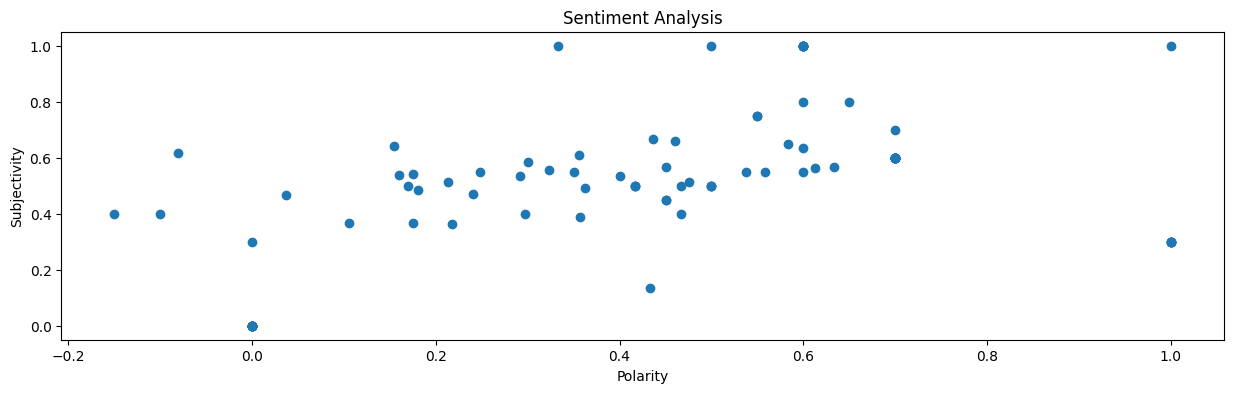

In [ ]:
f, axes = plt.subplots(figsize = (15,4))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [ ]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("/content/positive-words.txt",index=False)
dataframe.head()


,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,0.534375,0.292187,pos
1,pro build qualitycameravalue moneybatterycons ...,Pros :Build QualityCameraValue for moneyBatter...,0.550000,0.350000,pos
2,valuable price ok,It's valuable price ok,0.500000,0.500000,pos
3,good,Good,0.600000,0.700000,pos
4,quality,Quality,0.000000,0.000000,pos


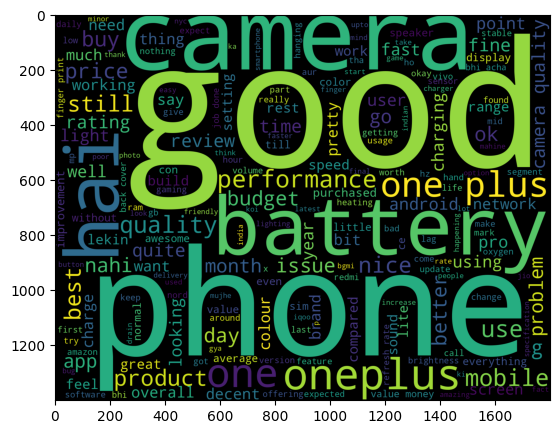

In [ ]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(10,5))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)


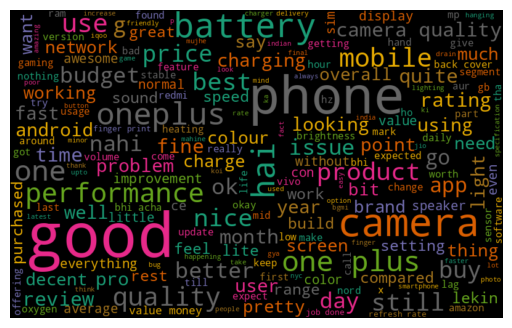

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)
